In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploder = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
Data = pd.read_csv('titanic.csv')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


в файле titanic.csv каждая строчка наборов данных содержит следующие поля:

- `Survived` - целевая переменная, выжил пассажир или нет

- `Pclass` — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- `Name` — имя;

- `Sex` — пол;

- `Age` — возраст;

- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;

- `Ticket` — номер билета;

- `Fare`— плата за проезд;

- `Cabin` — каюта;

- `Embarked` — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).
 

In [ ]:
X = Data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = Data['Survived']

In [ ]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
X = X.fillna({'Age': X.Age.mean(), 'Embarked': 'None'})

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [ ]:
X.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
X.Sex = X.Sex.map({'male': 1, 'female': 0})

In [ ]:
X.Embarked.unique()

array(['S', 'C', 'Q', 'None'], dtype=object)

In [ ]:
X = pd.get_dummies(X, columns=['Embarked'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass           891 non-null int64
Sex              891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked_C       891 non-null uint8
Embarked_None    891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_.shape

(1, 10)

In [ ]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)

In [ ]:
weights = [x[0] for x in sorted_weights]

In [ ]:
features = [x[1] for x in sorted_weights]

In [ ]:
df = pd.DataFrame({'features': features, 'weights':weights})

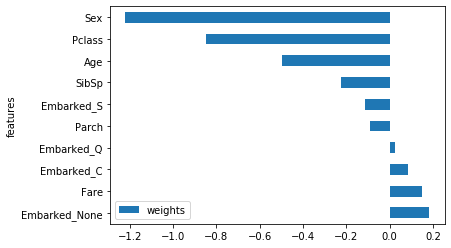

In [ ]:
ax = df.plot.barh(x='features', y='weights', rot=0,)

In [ ]:
def logistic_function(x):
  return 1/(1 + np.exp(-x))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-10, 10, 1000)

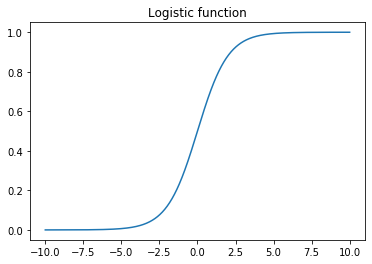

In [ ]:
plt.plot(x, logistic_function(x))
plt.title('Logistic function')
plt.show()

In [ ]:
pred_prob = logistic_function(np.dot(X_test, clf.coef_.T) + clf.intercept_)

In [ ]:
predict_proba = clf.predict_proba(X_test)[:,1]

In [ ]:
np.all([pred_prob.ravel(), predict_proba])

True

In [ ]:
np.mean(clf.predict(X_test) == y_test)

0.8116591928251121

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

0.8116591928251121

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

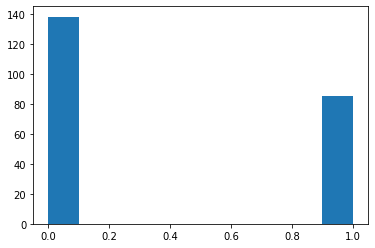

In [ ]:
plt.hist(y_test)

(array([63., 36., 14., 15.,  6., 16., 22., 20., 15., 16.]),
 array([0.02965955, 0.12342182, 0.21718409, 0.31094636, 0.40470863,
        0.4984709 , 0.59223317, 0.68599545, 0.77975772, 0.87351999,
        0.96728226]),
 <a list of 10 Patch objects>)

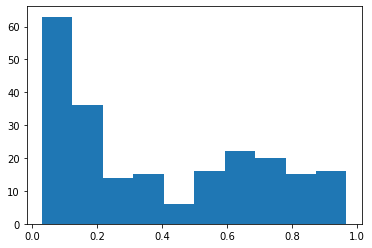

In [ ]:
plt.hist(clf.predict_proba(X_test)[:, 1])

In [ ]:
predict_proba = clf.predict_proba(X_test)[:, 1]

In [ ]:
np.mean(y_test[(predict_proba > 0.75) & (predict_proba < 0.85)])

0.8571428571428571